# Analysis on World of Warcraft PvP Battlegrounds


I am looking to pivot my career into the video game industry as a data scientist. With that said, I decided to do an extra credit project around one of longest standing games of all time, World of Warcraft. 

In World of Warcraft, there are player vs. player (PvP) battlegrounds. Here is a general overview of what that is:


   - There are two teams - Horde & Alliance

   - The specific battleground (map) is chosen at random. Each map has a designed overall common objective that the teams are battling for and it varies by each map.

   - Each of these teams has a combination of characters (classes). Each class has different skills. Some cast spells, some whack people with a sword/axe, and others heal from a distance.
   
   - Within each class, a player can choose a role. Some classes just do damage (dps) while others can also heal.


In World of Warcraft, the player gets to choose quite a bit. They get to choose which faction to play for (Horde or Alliance), what class to play (Warrior, Mage, Druid, etc...more detail in dataframe below), what role to take on (damage or heal), and what battleground (map) they would like to play on. 

With that said, one of the most key things in game design is "balance". I am considering a game to be "balanced" if it seems fair in win rates. Everyone wants to feel like they have a chance to win and that they aren't put at a disadvantaged vs. another player just because of what they choose. I will define "balanced" as being the highest winrate vs. the lowest winrate to be within +/- 5%. Let's take a look.



# Data Overview

We will first load in the code and look for any cleaning that may need to be done. I will also preface that I do not own this dataset and I downloaded it off a Kaggle user linked below:

https://www.kaggle.com/datasets/cblesa/world-of-warcraft-battlegrounds?select=wowbgs2.csv



The code is generally pretty clean but I will move a few columns around, remove some NaN values, and convert some column types as needed for later.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in the data
wow_data = pd.read_csv('wowbgs2.csv')


#moving some columns around
wow_data['Battleground'], wow_data['Code'] = wow_data['Code'], wow_data['Battleground'] 



#renaming columns after the move
wow_data = wow_data.rename(columns={'Battleground': 'Battle_ID', 'Code': 'Battleground'})



#replacing NaN's with 0's and making these columns integers
wow_data['Win'] = wow_data['Win'].fillna(0).astype(int)
wow_data['Lose'] = wow_data['Lose'].fillna(0).astype(int)



#replacing NaN's with 'None' instead. Also replacing '1's with "Yes" to replicate a string consistency in this column.
wow_data['BE'] = wow_data['BE'].fillna("None")
wow_data.loc[wow_data['BE'] == 1, 'BE'] = 'Yes'



#checking to see if any rows still have NaN in them for cleaning
NaN_rows = wow_data[wow_data.isna().any(axis = 1)]



#display(NaN_rows)

#display(wow_data.dtypes) --- used to look at values but not putting in final code

#shows just column headers which is good! Meaning no missing data



#displaying the data 
display(wow_data.head(15))
display(wow_data.shape)


,Battle_ID,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG1,WG,Horde,Hunter,1,3,14,48155,6641,532,1,0,dps,None
1,WG1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1,0,dps,None
2,WG1,WG,Alliance,Paladin,0,1,19,824,93879,252,0,1,heal,None
3,WG1,WG,Alliance,Paladin,1,2,25,7046,98599,274,0,1,heal,None
4,WG1,WG,Alliance,Rogue,2,3,23,65483,19629,268,0,1,dps,None
5,WG1,WG,Horde,Druid,4,5,12,31759,6071,531,1,0,dps,None
6,WG1,WG,Horde,Shaman,0,4,18,12933,94587,541,1,0,heal,None
7,WG1,WG,Alliance,Priest,9,5,24,123000,34687,269,0,1,dps,None
8,WG1,WG,Horde,Druid,2,1,9,13900,2438,523,1,0,dps,None
9,WG1,WG,Alliance,Priest,0,1,25,12566,36734,276,0,1,heal,None


(5383, 14)

Based on the above it would be helpful to have some descriptions of what each column is. Below is a description of each column:

 - **Battle_ID**: The unique identifier for the battle
 - **Battleground**: The map chosen. Each map has a name. These are abbreviations of those names.
 - **Faction**: The "team" that the player is playing for. Either Horde or Alliance.
 - **Class**: Which class the player is
 - **KB**: This stands for 'killing blows'. To get a killing blow, you must be the last person to hit the enemy before they die.
 - **D**: The number of deaths a player has in a battleground
 - **HK**: This stands for 'honorable kills' which is the total number of kills a player contributed to in a given battleground.
 - **DD**: Total damage done by a player
 - **HD**: Total healing done by a player
 - **Win**: '1' if the team won and '0' if Lost
 - **Rol**: Stands for 'Role'. 'Dps' is a damage-dealer class and 'heal' is a healer class
 - **BE**: Sometimes there are bonuses offered on the weekend to encourage people to play in a battleground. None or Yes.




# Player Choice Number 1 - Choosing Faction

One of the very first choices you get to do in World of Warcraft is pick your faction. You can either play Horde or Alliance. Let's start off by looking at the number of Horde and Alliance in our dataset.


,Faction,Number_of_Players
0,Alliance,2679
1,Horde,2704


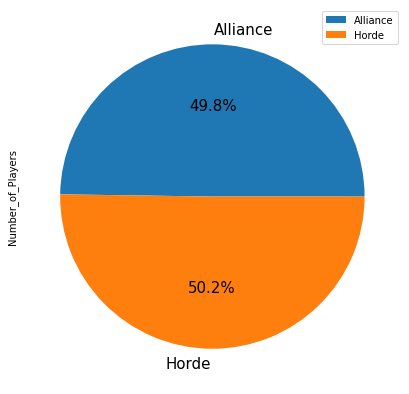

In [3]:
#grouping by faction
grouped_factions = wow_data.groupby(wow_data['Faction']).size()

#moving Series into DataFrame
grouped_factions_df = pd.DataFrame({'Number_of_Players' : grouped_factions})
grouped_factions_df.reset_index(inplace = True)
display(grouped_factions_df)


#graphing pie chart
pie_chart_faction = grouped_factions_df.plot.pie(y= 'Number_of_Players', 
                                              labels=grouped_factions_df['Faction'], 
                                              autopct='%1.1f%%',
                                              figsize = (7,7),
                                              fontsize = 15)


We see that the proportion of Horde to Alliance players are pretty similar overall which would make sense. When you sign up for a battleground, the game typically takes somewhere between 10-30 people per faction and throws them together to verse eachother. There could be minor differences in people leaving matches early, someone disconnecting, or someone not getting connected in the beginning. So this checks out. It is interesting to note, however, that the Horde have a slight advantage in Number_of_Players. While this likely isn't a huge contributor, it definitely could sway win rate a tad in their direction.


Now that we know the total number per faction, lets now look at our win rates by faction. If one faction has a materially higher win rate than the other faction, this would likely indicate to some inbalance in the game between teams.

,Faction,Win,Lose,Win_Percentage
0,Alliance,1000,1679,37.33%
1,Horde,1723,981,63.72%


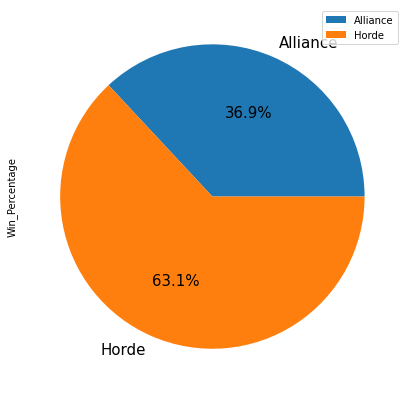

In [4]:

#group by faction
grouped_factions = wow_data.groupby(wow_data['Faction']).sum().reset_index()

#creat winrate column
grouped_factions['Win_Percentage'] = grouped_factions['Win'] / (grouped_factions['Win'] + grouped_factions['Lose'] )


#sort by lowest to highest winrate
grouped_factions = grouped_factions.sort_values(by = 'Win_Percentage', ascending = True)

grouped_factions.reset_index(drop = True, inplace = True)

#formating to percentage
grouped_factions['Win_Percentage'] = grouped_factions['Win_Percentage'].map(lambda x: "{:.2%}".format(x))


display(grouped_factions[['Faction', 'Win', 'Lose', 'Win_Percentage']])

#stripping % and moving back into float in order to graph
grouped_factions['Win_Percentage'] = grouped_factions['Win_Percentage'].str.rstrip('%').astype(float) / 100

#graphing
pie_chart_faction = grouped_factions.plot.pie(y= 'Win_Percentage', 
                                              labels=grouped_factions['Faction'], 
                                              autopct='%1.1f%%',
                                              figsize = (7,7),
                                              fontsize = 15)





We see from the above that the Horde have an overwhelming higher win rate percentage than the Alliance. This would indicate that there is likely some inbalance in the game between teams since it is larger than my defined 5%. Let's dig deeper now on the player's second choice - Class Selection - to see if that is a factor here. 

# Player Choice Number 2 - What Class to Play?

The second choice a player gets to make is decide what class they would like to play. In general, there are 12 different classes in this version of World of Warcraft, and they all have different skills and abilities that create different playstyles in the game. One of the hardest things to accomplish in a game is to make all classes "semi-equal" to create balance. So as time goes on, the game maker likely will keep tweaking the game design to make weaker classes stronger and strong classes weaker to try and find the perfect balance in the game.

First lets look at the distribution of players and what classes they are playing across all factions.

,Class,Number_of_Players
0,Shaman,588
1,Druid,556
2,Warrior,527
3,Paladin,486
4,Hunter,483
5,Mage,480
6,Priest,466
7,Rogue,428
8,Warlock,416
9,Demon Hunter,378


5383

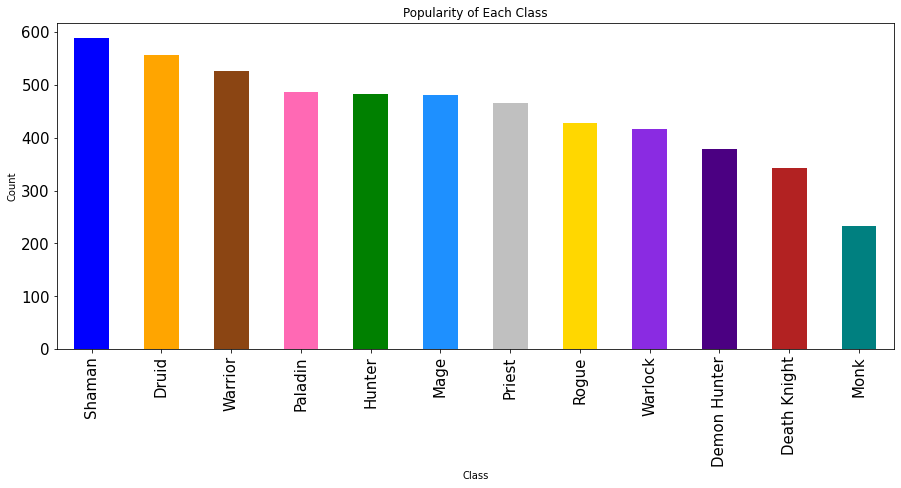

In [5]:
#grouping by class, counting, sorting, then checking to make sure total still is total number of rows
grouped_by_class = wow_data.groupby('Class').size()
grouped_by_class = grouped_by_class.sort_values(ascending = False)

#creating dataframe from the series data
grouped_df = pd.DataFrame({'Number_of_Players' : grouped_by_class})
grouped_df.reset_index(inplace = True)
display(grouped_df)


display(grouped_by_class.sum())

#bar chart
bar_chart_class = grouped_by_class.plot.bar(xlabel = "Class", ylabel ='Count', 
                                            color = ['blue', 'orange', 'saddlebrown', 'hotpink', 'green', 'dodgerblue',
                                                    'silver', 'gold', 'blueviolet', 'indigo', 'firebrick', 'teal'], 
                                            figsize = (15,6),
                                            fontsize = 15,
                                            title = "Popularity of Each Class"
                                            )




We see from the above that the "Shaman" class is the most popular class while the "Monk" is the least popular class. My asumption would be that the highest played classes likely have the highest win rates. So let's compare how well these classes do in battlegrounds to see if there is any connection between the popularity of the class vs. the win-rate of the class in a battleground.

In [6]:
#grouping by class and summing up stats
grouped_metrics = wow_data.groupby(wow_data['Class']).sum().reset_index()



#calculating a win-rate column, sorting, and reindexing with reformat
grouped_metrics['Win_Percentage'] = grouped_metrics['Win'] / (grouped_metrics['Win'] + grouped_metrics['Lose'] )

grouped_metrics = grouped_metrics.sort_values(by = 'Win_Percentage', ascending = False)

grouped_metrics.reset_index(drop = True, inplace = True)

grouped_metrics['Win_Percentage'] = grouped_metrics['Win_Percentage'].map(lambda x: "{:.2%}".format(x))


#merging my count dataframe from above to have in one final table
grouped_metrics_final = pd.merge(grouped_metrics, grouped_df, on = "Class", how = "left")


display(grouped_metrics_final[['Class', 'Win', 'Lose', 'Win_Percentage', 'Number_of_Players']])

,Class,Win,Lose,Win_Percentage,Number_of_Players
0,Shaman,323,265,54.93%,588
1,Death Knight,185,158,53.94%,343
2,Rogue,230,198,53.74%,428
3,Demon Hunter,202,176,53.44%,378
4,Warlock,216,200,51.92%,416
5,Monk,119,113,51.29%,232
6,Priest,234,232,50.21%,466
7,Paladin,240,246,49.38%,486
8,Warrior,259,268,49.15%,527
9,Mage,233,247,48.54%,480


Based on the results above, it is interesting to note that popularity of class does not always mean higher win rate. For example, both 'Druids' and 'Warriors' are high popularity classes while their win rates are both in the lower half.

It is also interesting to note that the range of Win_Percentage is more than 10 full percentage points difference. 'Shamans' are at almost 55% while 'Hunters' are lower than 45%. This would likely indicate that there is some class inbalance since it is above my 5% definition of balance.

While we recognize there is some inbalance likely, let's dig a little deeper on classes paired with factions. Lets look at the classes by faction and compare the distribution between the two to see if that might be leading to some of the win rate inbalance between factions.

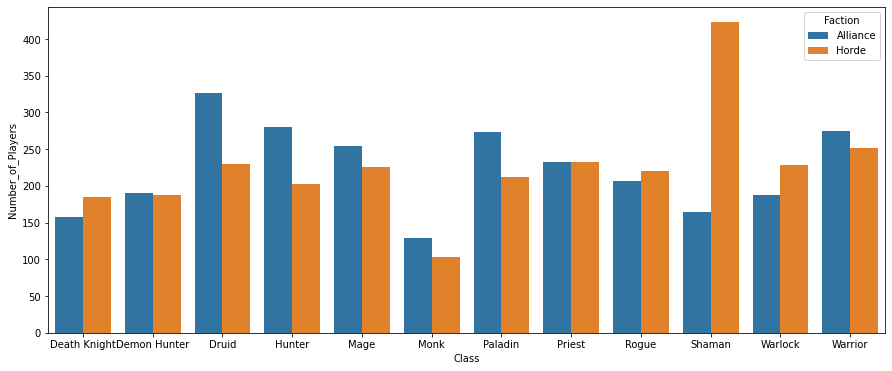

In [7]:
import seaborn as sns

#sorting by class then by faction
class_faction = wow_data.groupby(['Class', 'Faction']).size()

class_faction_group = pd.DataFrame({'Number_of_Players' : class_faction})
class_faction_group.reset_index(inplace = True)
#display(class_faction_group)

plt.figure(figsize=(15, 6))


#graphing
graph_faction_group = sns.barplot(data=class_faction_group, x='Class', y='Number_of_Players', 
                                 hue='Faction', )




From the above, we see that there are some pretty big discrepancies on class selection between faction. For example, 'Shaman' has many more Horde players than Alliance players. It also has the highest win rate from our previous tables. In addition, Alliance tend to have many more 'Druids' and they have one of the lowest win rates. A similar observation can be made with 'Hunters' as well. 

With that said, it is hard to tell if it is the class that leads to a lower win rate or player skill. However, based on the above, it is likely that some classes would need to be tuned a little better to produce a more 'balanced' win rate. 'Shamans' likely need to be tuned downward whereas a 'Druid' / 'Hunter' would need to be tuned upward.

Now let's look at 'Roles' to see if there might be any interesting connections to win rates there.

# Player Choice Number 3 - What Role to Choose?


Let's look at the distribution of Healers to damage dealers (DPS). This is important to look at because Healers tend to be very needed to win battlegrounds. If your team can survive longer, then you have the upperhand. Hence, generally more healers means that you have a greater chance of winning. My assumption is, since Horde has a higher win rate, they will likely have more Healers. Let's take a look.

In [8]:
#sorting by faction then by role
role_dist = wow_data.groupby(['Faction','Rol']).size()

role_dist = pd.DataFrame({'Number_of_Players' : role_dist}).reset_index()

role_dist

,Faction,Rol,Number_of_Players
0,Alliance,dps,2185
1,Alliance,heal,494
2,Horde,dps,2134
3,Horde,heal,570


We see from the above that the Horde have a much larger percentage of healers than Alliance. Out of the Horde players, around 21% are playing Healer (570 / 2704) vs. Alliance only has roughly 15% ( 494 / 2679 ). This is likely causing some of the inbalance between factions, along with class selection, as noted in the prior section. We would need to dig in further to truly evaluate this, but for this exercise, we will stick to just acknowledging that Horde Healers outweight Alliance Healers.

Lastly, let's drill down one level deeper in looking at some statistics by battleground.

# Player Choice Number 4 - What Battleground to Choose?


First, let's look at the popularity of each battleground.

,Battleground,Player_Count_By_Map
0,DG,209
1,SA,267
2,SS,279
3,ES,473
4,AB,475
5,TP,513
6,SM,734
7,TK,789
8,BG,817
9,WG,827


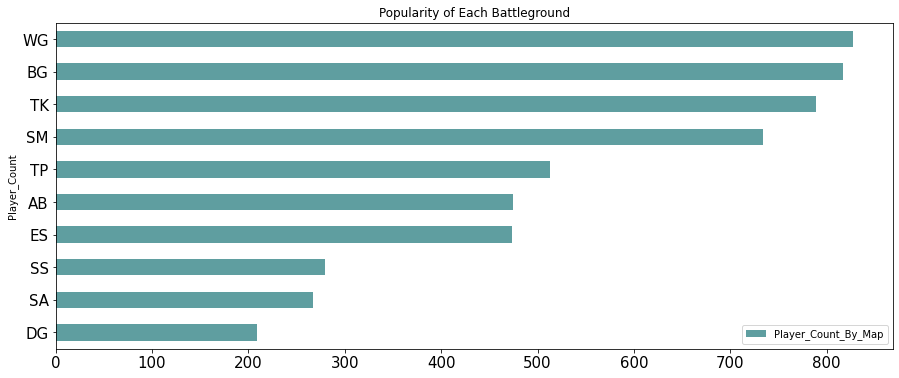

In [9]:

#counting BG players and sorting from least to most.
bg_summary = wow_data.groupby('Battleground').size().reset_index(name='Player_Count_By_Map').sort_values(['Player_Count_By_Map'], ascending = False)
bg_summary_sort = bg_summary.sort_values('Player_Count_By_Map', ascending = True).reset_index(drop = True)

display(bg_summary_sort)

bg_summary_sort.set_index('Battleground', inplace=True)

#plotting
bar_chart_bg = bg_summary_sort.plot.barh(xlabel = "Player_Count", ylabel ='Player_Count_By_Map', 
                                            figsize = (15,6),
                                            fontsize = 15,
                                            title = "Popularity of Each Battleground",
                                            color = 'cadetblue'
                                            )




We first see that "WG" is the most popular map whereas "DG" is the least popular map. Now let's compare this to win rates by faction.  If a game is balanced, you would see a similar win rate between Horde and Alliance. In addition, you would see similar win rates on each battleground. Just because a different map is chosen, doesn't mean that there should be a signficant change in win rate. 

In [10]:
#pulling out Faction data = Horde
Faction_Horde = wow_data[wow_data['Faction'] == 'Horde']

#pulling out Faction data = Alliance
Faction_Alliance = wow_data[wow_data['Faction'] == 'Alliance']

#calculating win rates by Horde & Ally
bg_horde = Faction_Horde.groupby('Battleground').sum().reset_index()
bg_horde['Win_Percentage_Horde'] = bg_horde['Win'] / (bg_horde['Win'] + bg_horde['Lose'])
bg_horde['Win_Percentage_Ally'] = 1 - bg_horde['Win_Percentage_Horde']
bg_horde['Win_Percentage_Horde'] = bg_horde['Win_Percentage_Horde'].map(lambda x: "{:.2%}".format(x))
bg_horde['Win_Percentage_Ally'] = bg_horde['Win_Percentage_Ally'].map(lambda x: "{:.2%}".format(x))

df_bg_horde = bg_horde[['Battleground','Win_Percentage_Horde', 'Win_Percentage_Ally']]

#merging player count by battleground and win rate of horde vs. ally
final_df_bg = pd.merge(df_bg_horde, bg_summary, how = 'left', on = 'Battleground')



final_sorted = final_df_bg.sort_values(by = ['Player_Count_By_Map'], ascending = False).reset_index(drop = True)
                          
display(final_sorted)


,Battleground,Win_Percentage_Horde,Win_Percentage_Ally,Player_Count_By_Map
0,WG,55.18%,44.82%,827
1,BG,67.07%,32.93%,817
2,TK,67.84%,32.16%,789
3,SM,62.23%,37.77%,734
4,TP,43.14%,56.86%,513
5,AB,87.82%,12.18%,475
6,ES,74.90%,25.10%,473
7,SS,50.36%,49.64%,279
8,SA,66.67%,33.33%,267
9,DG,57.69%,42.31%,209


We see from the above that both definitions of "win rate" as I defined above are violated. Looking at Horde vs. Alliance, we don't see very similar win rates. On a few maps we do, such as "SS" we see a pretty balanced map where Horde comes in at 50.36% and Alliance at 49.64%. On the other hand, there are maps like "AB" where Horde has an overwhelming win rate at 87.82%. While I expected to see the Horde vs. Alliance win rates to be significantly different since we proved this earlier, we see that even by battleground, the game is not "balanced" by my definition.

It is also interesting to note that the most balanced maps are not necessarily the most played. "AB" is one of the most unbalanced maps and is in the middle of the pack. Whereas "SS" is very balanced but towards the bottom of player_count.

For the last part of this analysis, let's look at the breakdown of class for a map that has a more even win rate (such as 'SS') and then an uneven win rate map (such as 'AB') to see the composition breakdown per faction by class. My assumption is that the distribution of class selection will vary greatly between the two. For example, I expect to see many more Alliance 'Druids' and 'Hunters' in 'AB' since their win rates are much lower by comparison.

First lets look at 'SS' where the win rate is relatively even. And then we will also graph 'AB' which is very uneven.

Text(0.5, 1.0, 'Number of players by Faction by Class in Battleground SS')

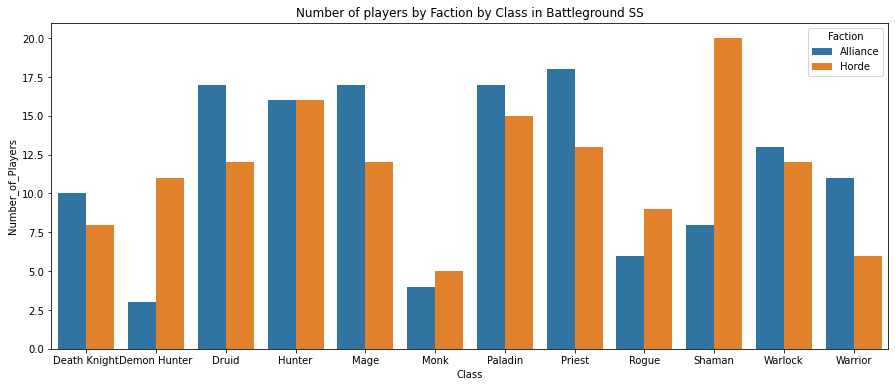

In [11]:
#grouping by battleground, faction, and then class
bg_class = wow_data.groupby(['Battleground','Faction','Class']).size()

bg_class_df = pd.DataFrame({'Number_of_Players' : bg_class}).reset_index()

#looking at BG = SS only
ss_bg_class = bg_class_df[bg_class_df['Battleground'] == 'SS']

plt.figure(figsize=(15, 6))

#plotting
graph_faction_SS = sns.barplot(data=ss_bg_class, x='Class', y='Number_of_Players', 
                                 hue='Faction')

graph_faction_SS.set_title('Number of players by Faction by Class in Battleground SS')




Text(0.5, 1.0, 'Number of players by Faction by Class in Battleground AB')

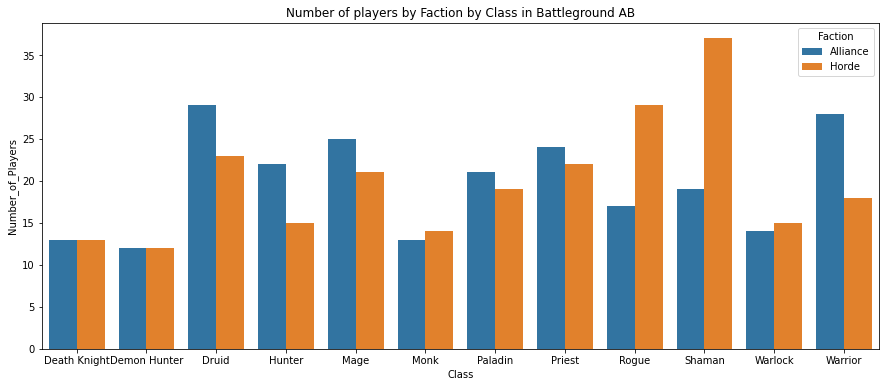

In [12]:
#looking at Battleground AB only

ab_bg_class = bg_class_df[bg_class_df['Battleground'] == 'AB']

plt.figure(figsize=(15, 6))

graph_faction_AB = sns.barplot(data=ab_bg_class, x='Class', y='Number_of_Players', 
                                 hue='Faction')

graph_faction_AB.set_title('Number of players by Faction by Class in Battleground AB')

Based on these two charts, there are some interesting things to point out:

- 'Druids' and 'Shamans' were the most popular for Alliance & Horde, respectively. This is the same for the two subsets of battlerounds I chose above for 'AB' and 'SS'.  Recall though that 'Druids' have one of the worst win rates whereas 'Shamans' have one of the best win rates.

- 'Hunters' were more popular in 'AB' for the Alliance and they have the worst win rates among all Classes.

- 'Rogues' were much more popular in 'AB' for the Horde than 'SS' and they have the 3rd highest win rate.

- The rest of the distribution is pretty similar among Alliance vs. Horde in 'SS' and 'AB'. While there are some slight differences, the class win rate likely does not play an effect on these other classes due to it being more balanced.

In general, it is difficult to say that class selection greatly affects the win rate of the individual battleground and would require further digging. While there are some variations between the two battlegrounds in 'Hunters' and 'Rogues', we still see 'Druids' and 'Shamans' at a very high rate but the overall battleground win rate is greatly different, meaning, that class selection may play less of a role here than anticipated. However, there is likely some degree of effect in what classes are playing in a battleground, but in general, there are liklely other factors that come into play that are not being represented by my analysis here.

# Conclusion

In general, we have observed that there are quite a few inbalances in this version of World of Warcraft. We were looking at differences greater than +/- 5% which we found quite a few.

After looking at the data we have found the following:

- The distribution of Horde & Alliance are similar. However, Horde's winrate (63%) is overwhelmingly higher than Alliance (37%) across all battlegrounds. This violates the defition of balanced.

- Class distribution between Horde & Alliance is pretty uneven. This matters because the win rate between classes are not balanced based on the data. We see that the win rate between the highest win rate class ('Shamans') and the lowest win rate class ('Druids') are greater than 5%. This would violate my definition of balanced.

- The win rate between battlegrounds is also not balanced. Some battlegrounds have a relatively even win rate while others have a very disparate win rate between factions. Most battlegrounds have larger than a 5% difference violating my defition of balanced.

Based on the above, it is likely to conclude that the game is not balanced in its current state. Balance is one of the hardest things to accomplish in a game and is always being fine tuned. The question becomes, what do you adjust to try and make the game more fair? Below are some thoughts on future adjustments or further analysis that needs to potentially be done to address.

- We see that the percentage of healers on the Horde faction are greater than the Alliance faction. While we did not dig into win rates with more healers, my assumption is this leads to some of the inbalance. This would need to be studied further and the game could be adjusted accordingly. For example, the game maker could limit the amount of healers in a battleground to make it even between the two teams. 
  
  - *(Note: This has actually been done in more current versions of the game. Likely combating inbalance.)*
  

- It would be good to dive into player metrics themselves. Based on the data above, it is difficult to determine if it is the class that is leading to the loss or if it is the player themselves not being as skilled. Taking groups of players with similar skillsets and then comparing them would be an effective way to dive deeper into class balance. 

  - *(Note: this does go on within some video games and game makers have created something called "matchmaking" which puts similar skilled players against eachother. Unsure if the same has been done within World of Warcraft.)*
  

- Digging into more specifics on each battleground would also be interesting. While I did not discuss it here, each map has a different objective in order to win. It would be important to look at and make sure that Horde does not have some inherent advantage over Alliance for some reason. 


- It is interesting to note that some of the most unbalanced battlegrounds are the most played. That is an interesting concept and should be evaluated why that is the case. Even if unbalanced gameplay is evident, players are choosing those battlegrounds to be the most popular likely for some reason. While maybe it doesn't help game balance, it could be used to determine what players are enjoying most and use it to create more future engaging experiences.



In general, my analysis just scratches the surface of game balance. And my suggestions above are just starting points. I believe balance is a constant changing goal in a video game and needs to be addressed constantly to keep the game fresh, fair, and enjoyable for all audiences. As time has gone on, balance has been more of a key focus with many video games and using data can only enhance the ability to maximize balance within a game.